In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#register matplotlib converters to avoid warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
db = pd.read_csv("AirPassengers.csv")
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],index_col="Month",
                 date_parser=dataparse)

db.head()


/tmp/ipykernel_39586/2484618762.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  db = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],index_col="Month",


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


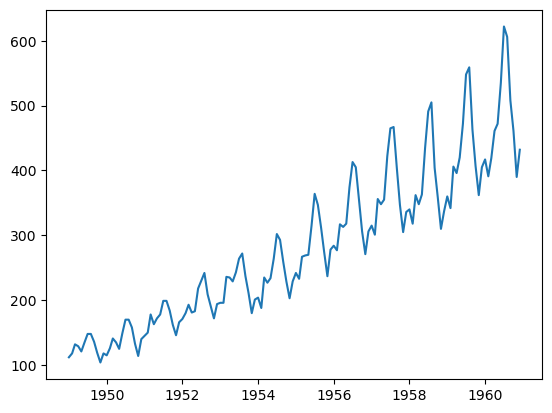

In [4]:
ts = db['#Passengers']
plt.plot(ts)

In [5]:
decomposiçao = seasonal_decompose(ts)
decomposiçao

In [6]:
tendencia = decomposiçao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [7]:
sazonalidade = decomposiçao.seasonal
sazonalidade

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [9]:
aleatorio = decomposiçao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

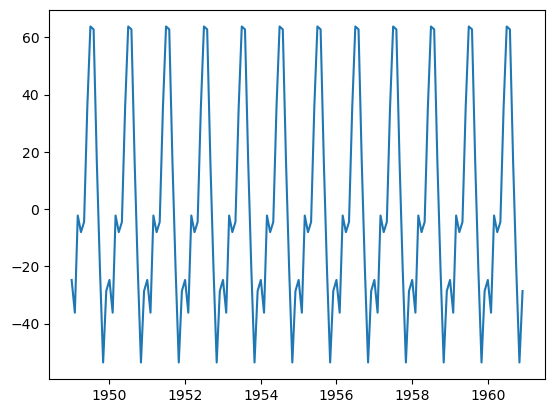

In [10]:
plt.plot(sazonalidade)

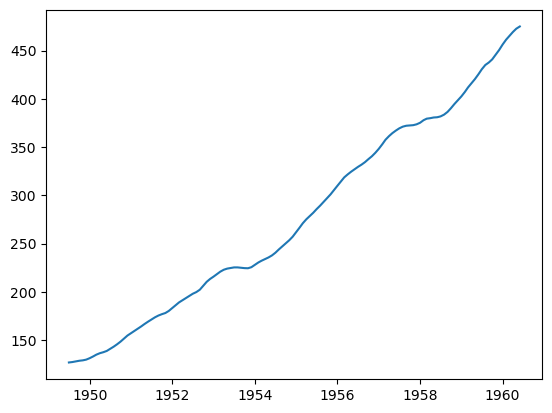

In [11]:
plt.plot(tendencia)

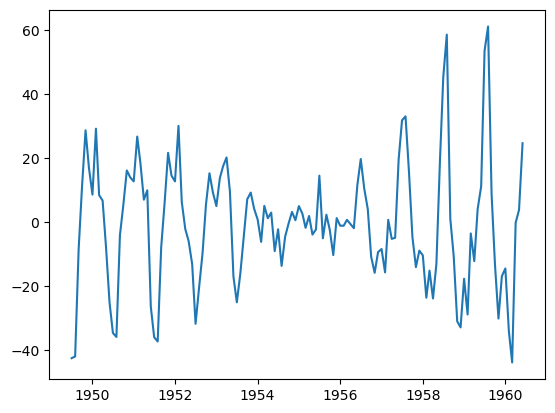

In [12]:
plt.plot(aleatorio)

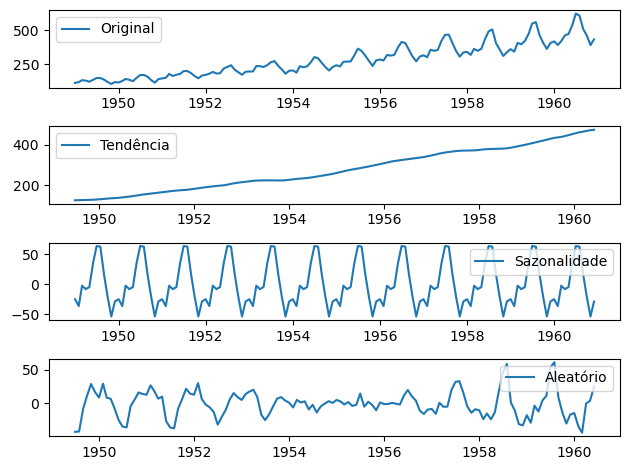

In [21]:
plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(sazonalidade, label='Sazonalidade')
plt.legend(loc='upper right')

plt.subplot(4,1,4)
plt.plot(aleatorio, label='Aleatório')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
